# Capstone Project Flask UI

Pada capstone ini anda diminta untuk membangun sebuah Flask UI sederhana yang berisi beberapa tampilan plot dari skeleton yang sudah disediakan dan satu plot tambahan berdasarkan analisis anda.

File ini dapat dimanfaatkan untuk membantu anda dalam proses wrangling dan visualization. Apabila proses wrangling sudah tepat dan hasil visualisasi sudah sesuai dengan ketentuan, anda dapat memindahkan kembali kode program yang sudah anda lengkapi ke dalam file `app.py`.

## Data Preprocessing

**Import library**

In [1]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

**Load data**

Bacalah file `googleplaystore.csv` data dan simpan ke objek dataframe dengan nama playstore

In [2]:
playstore = pd.read_csv("data/googleplaystore.csv")
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Data Cleansing** 

**_Task 1:_** Hapus data yang duplikat berdasarkan kolom App, dengan tetap keep data pertama (hint : gunakan parameter subset)

In [3]:
playstore.drop_duplicates(subset ='App',keep = 'first', inplace=True) 

Bagian ini untuk menghapus row 10472 karena nilai data tersebut tidak tersimpan pada kolom yang benar

In [4]:
playstore.drop([10472], inplace=True)

In [5]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


**_Task 2:_** Cek tipe data kolom Category. Jika masih tersimpan dengan format tipe data yang salah, ubah ke tipe data yang sesuai


In [6]:
playstore.Category = playstore['Category'].astype('category')
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [7]:
playstore['Category'].unique()

['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', ..., 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']
Length: 33
Categories (33, object): ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', ..., 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER']

In [8]:
playstore.Installs = playstore['Installs'].apply(lambda x: x.replace(',',''))
playstore.Installs = playstore['Installs'].apply(lambda x: x.replace('+',''))

**_Task 3:_** Pada kolom Installs Buang tanda koma(,) dan tanda tambah(+) kemudian ubah tipe data menjadi integer

Bagian ini untuk merapikan kolom Size, Anda tidak perlu mengubah apapun di bagian ini

In [9]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)


**_Task 4:_** Pada kolom Price, buang karakater $ pada nilai Price lalu ubah tipe datanya menjadi float

In [10]:
playstore.Price = playstore["Price"].apply(lambda x: x.replace('$',''))
playstore['Price'] = playstore['Price'].astype('float')

Ubah tipe data Reviews, Size, Installs ke dalam tipe data integer

In [11]:
##code here

## Data Wrangling

In [12]:
df2 = playstore.copy()

In [13]:
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**_Task 5:_** Dataframe top_category dibuat untuk menyimpan frekuensi aplikasi untuk setiap Category. 
Gunakan crosstab untuk menghitung frekuensi aplikasi di setiap category kemudian gunakan `Jumlah`
sebagai nama kolom dan urutkan nilai frekuensi dari nilai yang paling banyak. Terakhir reset index dari dataframe top_category.

In [14]:
top_category = pd.crosstab(
index=playstore['Category'],
    columns='Jumlah'
).sort_values('Jumlah', ascending = False).head()

In [15]:
top_category.reset_index(inplace = True)

In [16]:
top_category.head()

col_0,Category,Jumlah
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395


**_Task 6:_** Ini adalah bagian untuk melengkapi konten value box 
most category mengambil nama category paling banyak mengacu pada dataframe `top_category`
total mengambil frekuensi/jumlah category paling banyak mengacu pada dataframe `top_category`

In [17]:
#most_categories = print('FAMILY')
#total = print('1832')
most_categories = top_category['Category'][0]
total = top_category['Jumlah'][0]

In [18]:
most_categories 

'FAMILY'

`rev_table` adalah tabel yang berisi 10 aplikasi yang paling banyak direview oleh pengguna.
Silahkan melakukan agregasi data yang tepat menggunakan `groupby` untuk menampilkan 10 aplikasi yang diurutkan berdasarkan jumlah Review pengguna. 

Tabel yang ditampilkan terdiri dari 4 kolom yaitu nama Category, nama App, total Reviews, dan rata-rata Rating.
Pindahkan kode wrangling yang disimpan dalam variable `rev_table` pada `blank code` yang telah di chaining dengan kode `.to_html`.

In [19]:
rev_table = playstore.groupby(by= ['Category','App']).agg({'Reviews': 'sum', 'Rating': 'mean'}).sort_values(by='Reviews', ascending= False).reset_index().iloc[0:10].to_html(classes=['table thead-light table-striped table-bordered table-hover table-sm'])

Apabila menuliskan kode program yang tepat maka hasil wrangling adalah sebagai berikut :

In [20]:
rev_table

'<table border="1" class="dataframe table thead-light table-striped table-bordered table-hover table-sm">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Category</th>\n      <th>App</th>\n      <th>Reviews</th>\n      <th>Rating</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>SOCIAL</td>\n      <td>Facebook</td>\n      <td>78158306</td>\n      <td>4.1</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>COMMUNICATION</td>\n      <td>WhatsApp Messenger</td>\n      <td>69119316</td>\n      <td>4.4</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>SOCIAL</td>\n      <td>Instagram</td>\n      <td>66577313</td>\n      <td>4.5</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>COMMUNICATION</td>\n      <td>Messenger – Text and Video Chat for Free</td>\n      <td>56642847</td>\n      <td>4.0</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>GAME</td>\n      <td>Clash of Clans</td>\n      <td>44891723</td>\n      <td>4.

## Data Visualization

**Membuat Bar Plot**

**_Task 7:_** 
Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category.
Buatlah bar plot dimana axis x adalah nama Category dan axis y adalah jumlah aplikasi pada setiap kategori, kemudian urutkan dari jumlah terbanyak

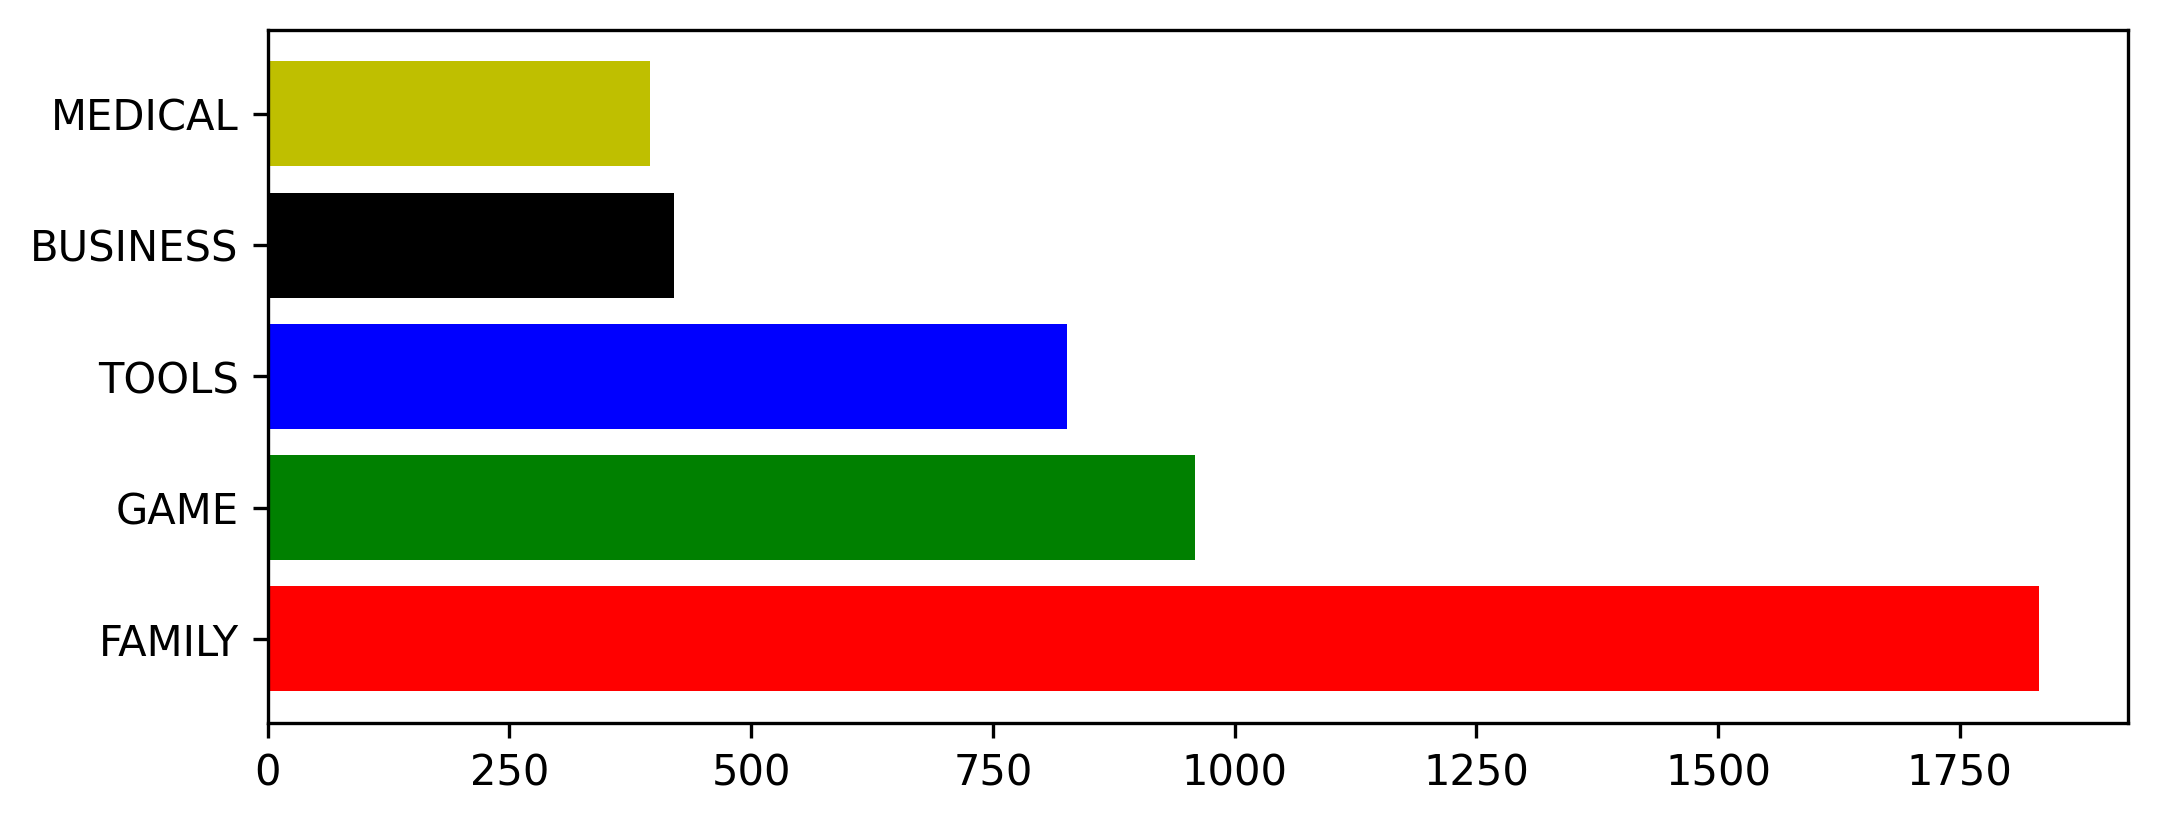

In [21]:
cat_order = df2.groupby('Category').agg({
'Category' : 'count'
 }).rename({'Category':'Total'}, axis=1).sort_values('Total').head()
X = top_category['Category']
Y = top_category['Jumlah']
my_colors = ['r','g','b','k','y','m','c']
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
plt.barh(X,Y, color=my_colors)
# bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('cat_order.png',bbox_inches="tight") 

**Membuat Scatter Plot**

**_Task 8:_** Buatlah scatter plot untuk menampilkan hubungan dan persebaran apalikasi dilihat dari Review vs Rating.
Ukuran scatter menggambarkan berapa banyak pengguna yang telah menginstall aplikasi 
    

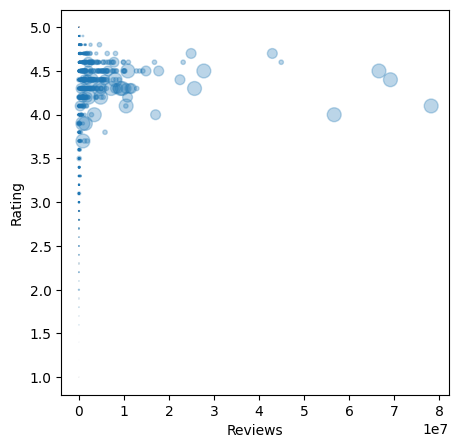

In [22]:
X = df2['Reviews'].values # axis x
Y = df2['Rating'].values # axis y
area = playstore['Installs'].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
# isi nama method untuk scatte plot, variabel x, dan variabel y
plt.scatter(X,Y, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")

**Membuat Histogram Size Distribution**

**_Task 9:_** Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes). Histogram yang terbentuk terbagi menjadi 100 bins

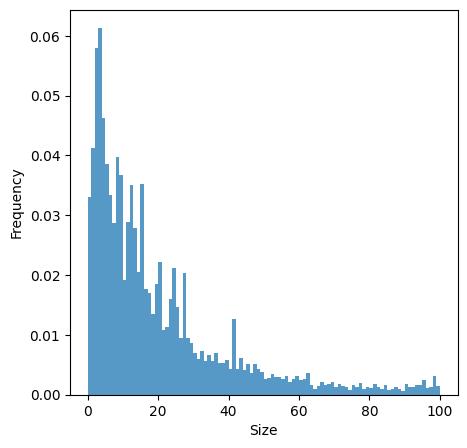

In [23]:
X=(df2['Size']/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(X, bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")

**_Task 10:_** Buatlah plot berdasarkan hasil analisis anda. Plot yang dibuat tidak diperbolehkan sama dengan plot yang sudah dicontohkan.

In [24]:
df5=playstore[playstore['Price']!=0].sort_values('Price', ascending = False).head(10)
df5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41000000,1000,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
5369,I am Rich,FINANCE,4.3,180,3800000,5000,Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129,2700000,1000,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2700000,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
5359,I am rich(premium),FINANCE,3.5,472,965000,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
4197,most expensive app (H),FAMILY,4.3,6,1500000,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700000,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700000,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up


C:\Users\anner\AppData\Local\Temp\ipykernel_18136\2122785206.py:20: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  plt.savefig('cat_order2.png',bbox_inches="tight")
C:\Users\anner\anaconda3\envs\capstone-flask2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


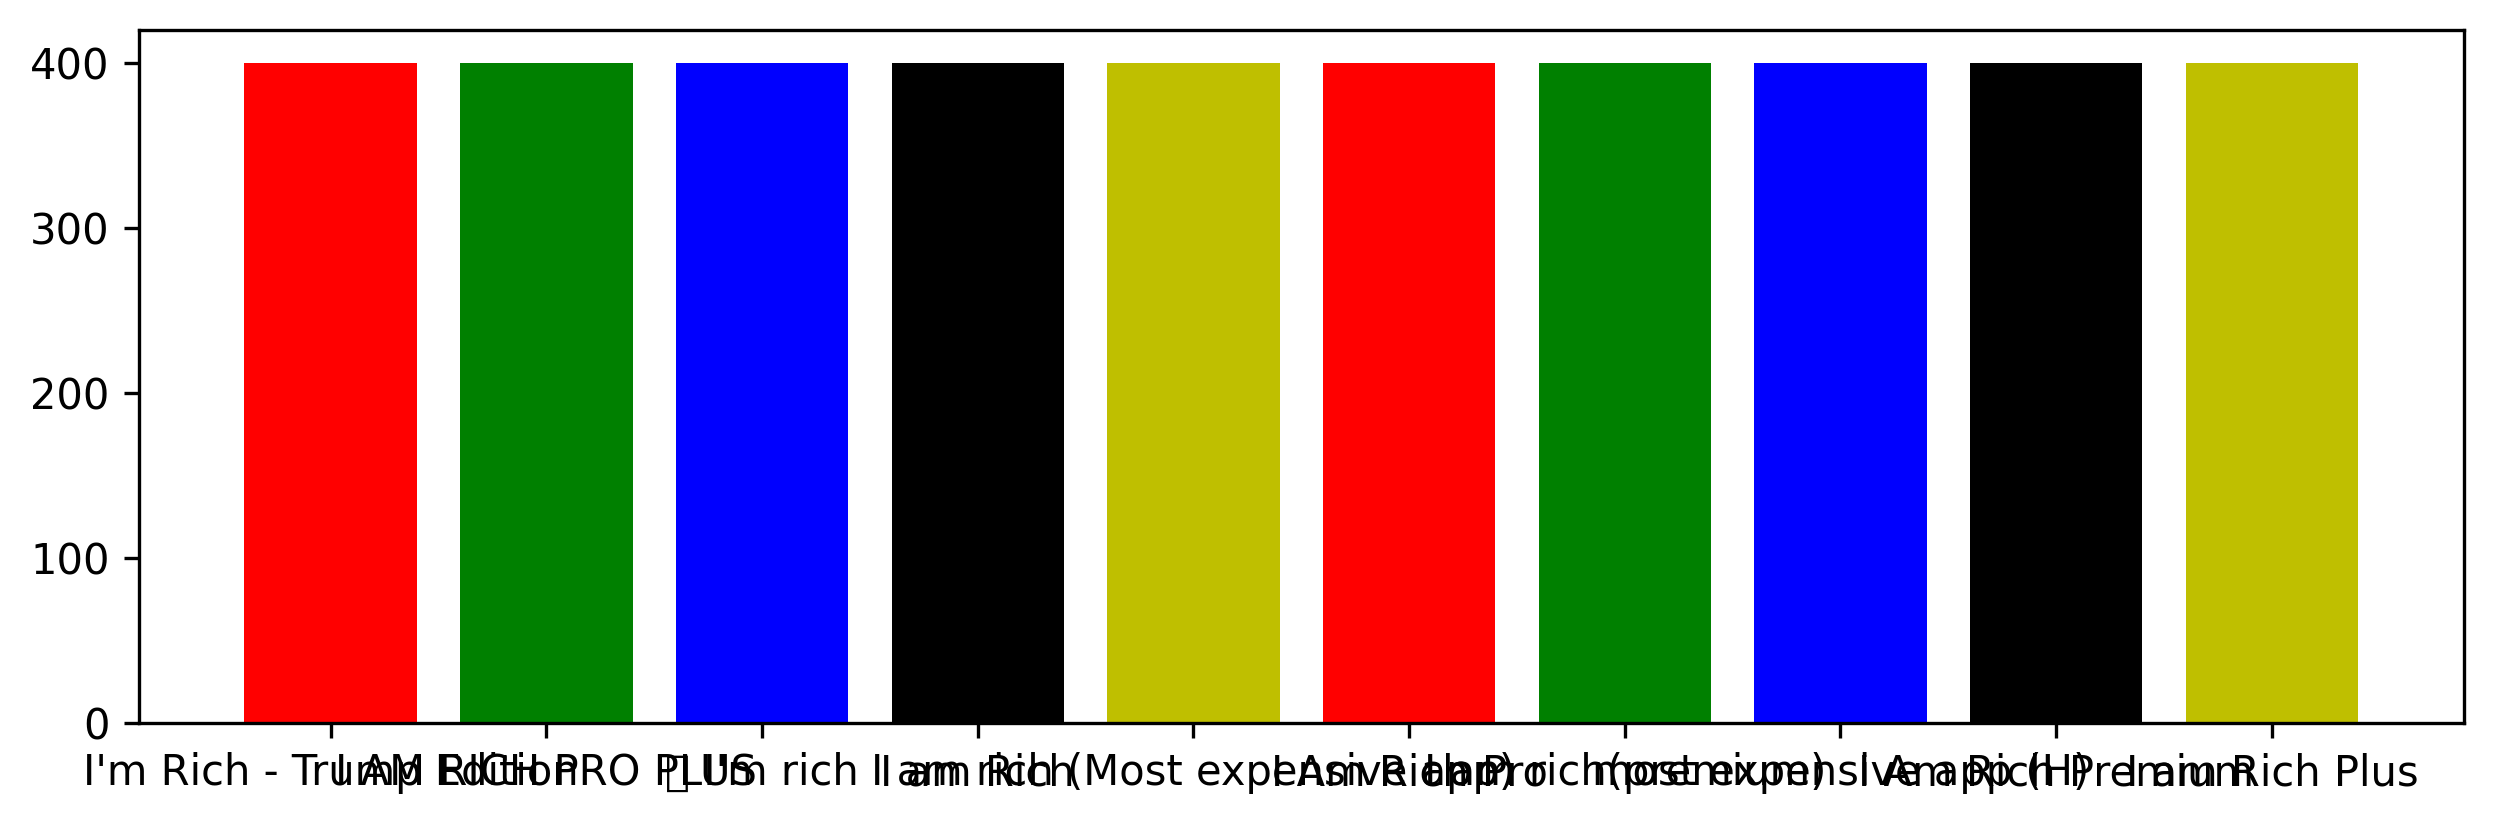

In [25]:
#cat_order = df2.groupby('Category').agg({
#'Category' : 'count'
# }).rename({'Category':'Total'}, axis=1).sort_values('Total').head()
#X = top_category['Category']
#Y = top_category['Jumlah']
#my_colors = ['r','g','b','k','y','m','c']
# bagian ini digunakan untuk membuat kanvas/figure
#fig = plt.figure(figsize=(8,3),dpi=300)
#fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
#plt.barh(X,Y, color=my_colors)
# bagian ini digunakan untuk menyimpan plot dalam format image.png
#plt.savefig('cat_order.png',bbox_inches="tight") 
X1 = df5['App']
Y2 = df5['Price']
my_colors2 = ['r','g','b','k','y']
fig2 = plt.figure(figsize=(10,3),dpi=300)
fig2.add_subplot()
plt.bar(X1,Y2, color=my_colors2)
plt.savefig('cat_order2.png',bbox_inches="tight") 

In [26]:
df7=playstore[playstore['Category']== 'FAMILY']
df7['Genres']=df7['Genres'].astype('category')
df7.dtypes

C:\Users\anner\AppData\Local\Temp\ipykernel_18136\3558312700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Genres']=df7['Genres'].astype('category')


App                 object
Category          category
Rating             float64
Reviews              int32
Size                 int32
Installs             int32
Type                object
Price              float64
Content Rating      object
Genres            category
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [27]:
top_familycategory = pd.crosstab(
index=df7['Genres'],
    columns='Jumlah'
).sort_values('Jumlah', ascending = False).head()

In [28]:
top_familycategory.reset_index(inplace = True)

In [29]:
top_familycategory

col_0,Genres,Jumlah
0,Entertainment,469
1,Education,411
2,Simulation,183
3,Casual,142
4,Puzzle,95


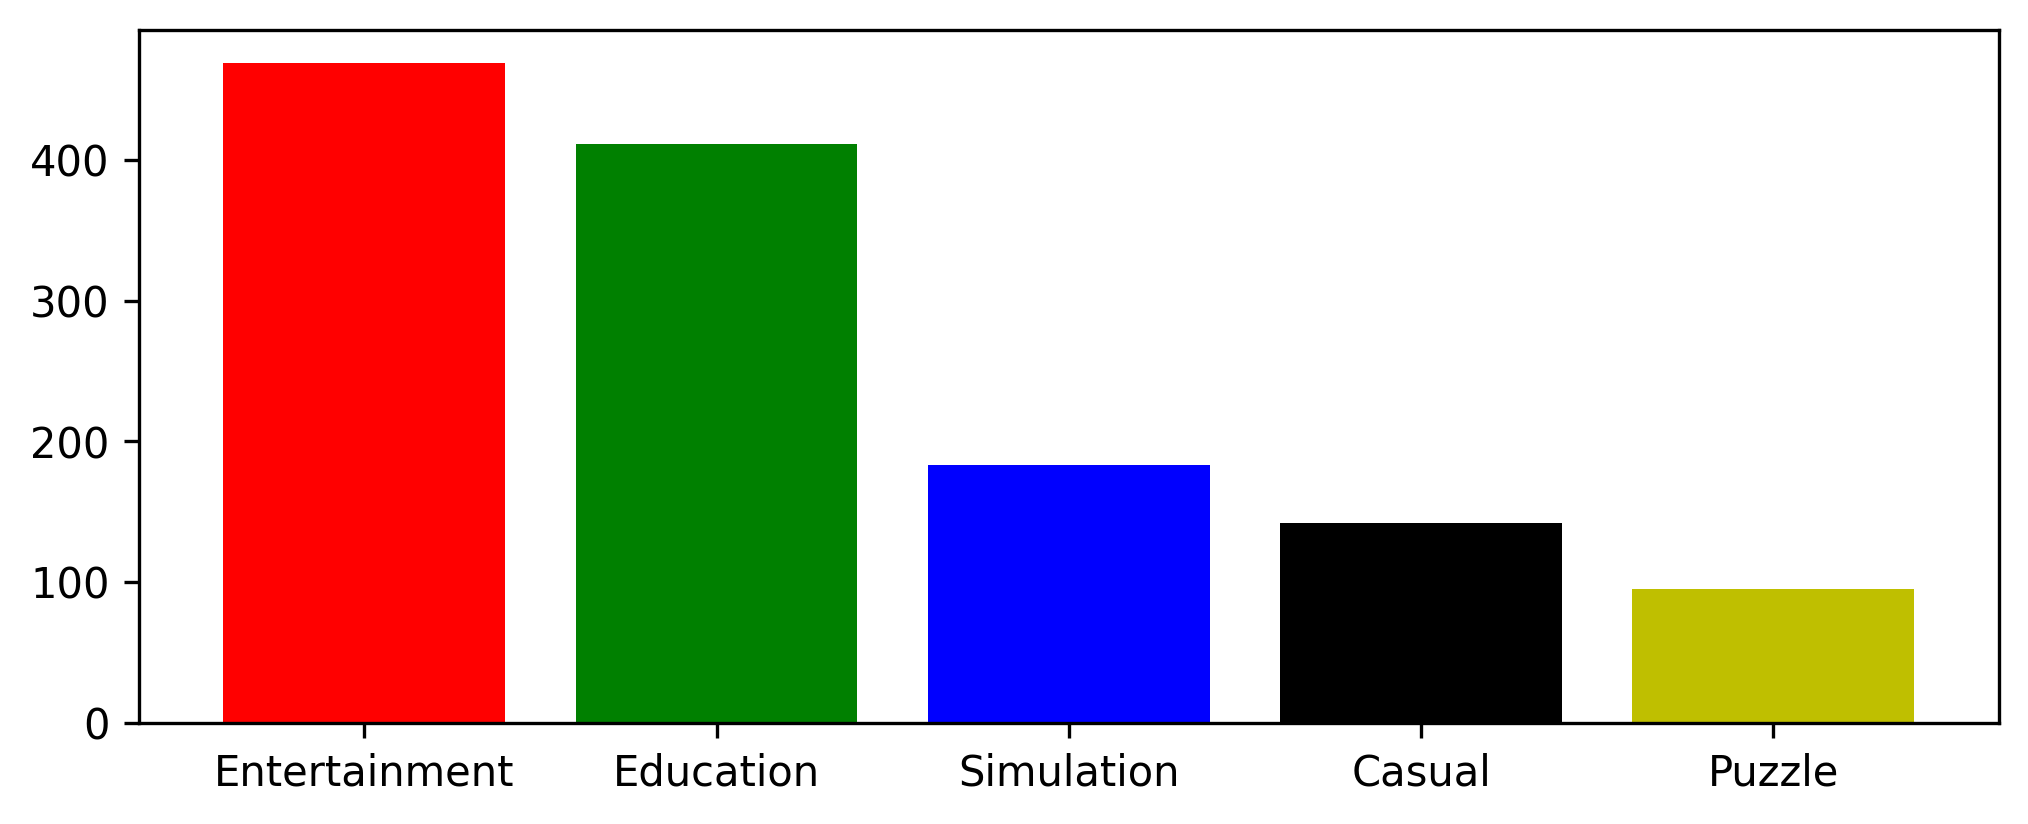

In [30]:
X = top_familycategory['Genres']
Y = top_familycategory['Jumlah']
my_colors = ['r','g','b','k','y']
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
plt.bar(X,Y, color=my_colors)
# bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('cat_order5.png',bbox_inches="tight") 



In [36]:
df8=playstore[playstore['Category']== 'GAME']

In [37]:
top_gamecategory = pd.crosstab(
index=df8['Genres'],
    columns='Jumlah'
).sort_values('Jumlah', ascending = False).head()
top_gamecategory

col_0,Jumlah
Genres,
Action,299
Arcade,184
Racing,91
Adventure,73
Card,47


In [33]:
df8.sort_values('Rating',ascending = False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7466,211:CK,GAME,5.0,8,38000000,10,Paid,0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up
9265,EC Mover,GAME,5.0,5,4600000,10,Free,0.00,Everyone,Racing,"August 1, 2018",1.11,4.0.3 and up
9056,Santa's Monster Shootout DX,GAME,5.0,4,33000000,50,Paid,1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up
10776,Monster Ride Pro,GAME,5.0,1,24000000,10,Free,0.00,Everyone,Racing,"March 5, 2018",2.0,2.3 and up
10721,Mad Dash Fo' Cash,GAME,5.0,14,16000000,100,Free,0.00,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up


In [34]:
best_game = df8.groupby(by= ['App']).agg({'Reviews': 'sum', 'Rating': 'mean'}).sort_values(by='Reviews', ascending= False).reset_index().iloc[0:10].to_html(classes=['table thead-light table-striped table-bordered table-hover table-sm'])

In [35]:
best_game

'<table border="1" class="dataframe table thead-light table-striped table-bordered table-hover table-sm">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>App</th>\n      <th>Reviews</th>\n      <th>Rating</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Clash of Clans</td>\n      <td>44891723</td>\n      <td>4.6</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Subway Surfers</td>\n      <td>27722264</td>\n      <td>4.5</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Clash Royale</td>\n      <td>23133508</td>\n      <td>4.6</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Candy Crush Saga</td>\n      <td>22426677</td>\n      <td>4.4</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>My Talking Tom</td>\n      <td>14891223</td>\n      <td>4.5</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>8 Ball Pool</td>\n      <td>14198297</td>\n      <td>4.5</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>Sh